# Objective
In this chapter we will learn about the following:
* Reading/Writing multiple files
* Some basic techniques to handle rows/columns/indices
* Using query function to filter the data
* Group by and Aggregated functions
* Joins to join/merge dataframes

In [1]:
#pip install pandas
import pandas as pd

# About Dataset

In this notebook we would be using two datasets. The first one is **trains.csv** which talks about the details of different trains
their number, deptarture time/stations and arrival time and station etc. The other dataset that would be used is the **stations.csv**, it enables us to understand the location of each station with their code along with their spatial detials like latitute and longitude.

**[Link](https://github.com/bhav09/DataAnalysis-Course-MonSchool/tree/main/Chapter%201/Data)** to dataset.

## Getting familiar with data frame

In [5]:
#reading data
trains=pd.read_csv('trains.csv')

#head enables us the see the first few rows; default:5 (same's for tail)
trains.head()

,number,name,type,zone,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,duration_h,duration_m,distance,return_train,sleeper,third_ac,second_ac,first_ac,first_class,chair_car
0,04601,Jammu Tawi Udhampur Special,DEMU,NR,JAT,JAMMU TAWI,UHP,UDHAMPUR,10:40:00,12:15:00,1.0,35.0,53.0,04602,0,0,0,0,0,0
1,04602,UDHAMPUR JAMMUTAWI DMU,DEMU,NR,UHP,UDHAMPUR,JAT,JAMMU TAWI,06:45:00,08:35:00,1.0,50.0,53.0,04601,0,0,0,0,0,0
2,04603,JAT UDAHMPUR DMU,DEMU,NR,JAT,JAMMU TAWI,UHP,UDHAMPUR,16:15:00,17:50:00,1.0,35.0,53.0,04604,0,0,0,0,0,0
3,04604,UDHAMPUR JAMMUTAWI DMU,DEMU,NR,UHP,UDHAMPUR,JAT,JAMMU TAWI,18:20:00,19:50:00,1.0,30.0,53.0,04603,0,0,0,0,0,0
4,04728,Mumbai BandraT-Bikaner SF Special,SF,NWR,BDTS,MUMBAI BANDRA TERMINUS,BKN,BIKANER JN,14:35:00,12:30:00,21.0,55.0,1212.0,04727,1,1,1,0,0,0


In [6]:
trains.tail()

,number,name,type,zone,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,duration_h,duration_m,distance,return_train,sleeper,third_ac,second_ac,first_ac,first_class,chair_car
5203,64492,New Delhi Palwal Ladies Special,MEMU,?,NDLS,NEW DELHI,PWL,PALWAL,17:50:00,19:20:00,1.0,30.0,56.0,64491,0,0,0,0,0,0
5204,67296,Visakhapatnam Rajahmundry Pass,Pass,?,VSKP,VISHAKAPATNAM,RJY,RAJAMUNDRY,18:10:00,23:25:00,5.0,15.0,201.0,67295,0,0,0,0,0,0
5205,70101,Madgaon Karwar Passenger,Pass,?,MAO,MADGAON,KAWR,KARWAR,19:00:00,20:20:00,1.0,20.0,82.0,70102,0,0,0,0,0,0
5206,83112,Danapur Giridih Express,Exp,?,DNR,DANAPUR,GRD,Giridih,19:00:00,04:30:00,9.0,30.0,298.0,NaN,1,0,0,0,0,0
5207,84369,Tribeni Link Express,Exp,?,BRWD,BARWADIH JN,BE,BAREILLY,15:30:00,12:30:00,21.0,0.0,862.0,NaN,1,0,0,0,0,0


In [7]:
 #finding the shape of the dataframe: (rows,cols)
trains.shape

(5208, 20)

In [8]:
stations=pd.read_csv('stations.csv')
stations.head()

,code,name,zone,state,address,latitude,longitude
0,BDHL,Badhal,NWR,Rajasthan,"Kishangarh Renwal, Rajasthan",75.451645,27.252059
1,KHH,KICHHA,NER,Uttar Pradesh,"Kichha, Uttar Pradesh",79.519746,28.913427
2,SRKN,Sherekan,NWR,Rajasthan,"MDR 89, Rajasthan",74.434991,29.555198
3,BKKA,Bhukarka,NWR,Rajasthan,"Bhukarka, Rajasthan",74.751031,29.238227
4,NHR,Nohar,NWR,Rajasthan,"State Highway 36, Rajasthan",74.773628,29.192563


In [9]:
stations.shape

(8697, 7)

## Filtering Data

In [10]:
#finding those trains that depart from Mumbai
trains_from_mumbai=trains.query('from_station_code=="BDTS"')
trains_from_mumbai.head()

,number,name,type,zone,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,duration_h,duration_m,distance,return_train,sleeper,third_ac,second_ac,first_ac,first_class,chair_car
4,04728,Mumbai BandraT-Bikaner SF Special,SF,NWR,BDTS,MUMBAI BANDRA TERMINUS,BKN,BIKANER JN,14:35:00,12:30:00,21.0,55.0,1212.0,04727,1,1,1,0,0,0
128,09021,BANDRA TERMINUS - JAMMU TAWI AC Suvidha Specia...,SF,WR,BDTS,MUMBAI BANDRA TERMINUS,JAT,JAMMU TAWI,16:55:00,01:40:00,32.0,45.0,1955.0,09022,1,1,1,1,0,0
131,09561,Bandra Terminus Okha Weekly Special,Exp,WR,BDTS,MUMBAI BANDRA TERMINUS,OKHA,OKHA,23:55:00,20:15:00,20.0,20.0,980.0,09562,1,0,1,0,0,0
445,12216,Mumbai Bandra T. - Delhi Sarai Rohilla Garib Rath,GR,NR,BDTS,MUMBAI BANDRA TERMINUS,DEE,DELHI SARAI ROHILLA,12:55:00,12:20:00,23.0,25.0,1431.0,12215,0,1,0,0,0,0
559,19065,MUMBAI BANDRA - BHAGAT KI KOTHI Exp,Exp,WR,BDTS,MUMBAI BANDRA TERMINUS,BGKT,BHAGAT KI KOTHI,23:25:00,17:00:00,17.0,35.0,935.0,19066,1,1,1,0,0,0


In [11]:
trains_from_mumbai.shape

(27, 20)

In [15]:
trains_from_mumbai.reset_index(drop=True).head()

,number,name,type,zone,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,duration_h,duration_m,distance,return_train,sleeper,third_ac,second_ac,first_ac,first_class,chair_car
0,04728,Mumbai BandraT-Bikaner SF Special,SF,NWR,BDTS,MUMBAI BANDRA TERMINUS,BKN,BIKANER JN,14:35:00,12:30:00,21.0,55.0,1212.0,04727,1,1,1,0,0,0
1,09021,BANDRA TERMINUS - JAMMU TAWI AC Suvidha Specia...,SF,WR,BDTS,MUMBAI BANDRA TERMINUS,JAT,JAMMU TAWI,16:55:00,01:40:00,32.0,45.0,1955.0,09022,1,1,1,1,0,0
2,09561,Bandra Terminus Okha Weekly Special,Exp,WR,BDTS,MUMBAI BANDRA TERMINUS,OKHA,OKHA,23:55:00,20:15:00,20.0,20.0,980.0,09562,1,0,1,0,0,0
3,12216,Mumbai Bandra T. - Delhi Sarai Rohilla Garib Rath,GR,NR,BDTS,MUMBAI BANDRA TERMINUS,DEE,DELHI SARAI ROHILLA,12:55:00,12:20:00,23.0,25.0,1431.0,12215,0,1,0,0,0,0
4,19065,MUMBAI BANDRA - BHAGAT KI KOTHI Exp,Exp,WR,BDTS,MUMBAI BANDRA TERMINUS,BGKT,BHAGAT KI KOTHI,23:25:00,17:00:00,17.0,35.0,935.0,19066,1,1,1,0,0,0


In [16]:
#resetting index
trains_from_mumbai=trains_from_mumbai.reset_index(drop=True)
trains_from_mumbai.head()

,number,name,type,zone,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,duration_h,duration_m,distance,return_train,sleeper,third_ac,second_ac,first_ac,first_class,chair_car
0,04728,Mumbai BandraT-Bikaner SF Special,SF,NWR,BDTS,MUMBAI BANDRA TERMINUS,BKN,BIKANER JN,14:35:00,12:30:00,21.0,55.0,1212.0,04727,1,1,1,0,0,0
1,09021,BANDRA TERMINUS - JAMMU TAWI AC Suvidha Specia...,SF,WR,BDTS,MUMBAI BANDRA TERMINUS,JAT,JAMMU TAWI,16:55:00,01:40:00,32.0,45.0,1955.0,09022,1,1,1,1,0,0
2,09561,Bandra Terminus Okha Weekly Special,Exp,WR,BDTS,MUMBAI BANDRA TERMINUS,OKHA,OKHA,23:55:00,20:15:00,20.0,20.0,980.0,09562,1,0,1,0,0,0
3,12216,Mumbai Bandra T. - Delhi Sarai Rohilla Garib Rath,GR,NR,BDTS,MUMBAI BANDRA TERMINUS,DEE,DELHI SARAI ROHILLA,12:55:00,12:20:00,23.0,25.0,1431.0,12215,0,1,0,0,0,0
4,19065,MUMBAI BANDRA - BHAGAT KI KOTHI Exp,Exp,WR,BDTS,MUMBAI BANDRA TERMINUS,BGKT,BHAGAT KI KOTHI,23:25:00,17:00:00,17.0,35.0,935.0,19066,1,1,1,0,0,0


In [17]:
#adding new column 
trains_from_mumbai['booking_category']='all'
trains_from_mumbai.head()

,number,name,type,zone,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,...,duration_m,distance,return_train,sleeper,third_ac,second_ac,first_ac,first_class,chair_car,booking_category
0,04728,Mumbai BandraT-Bikaner SF Special,SF,NWR,BDTS,MUMBAI BANDRA TERMINUS,BKN,BIKANER JN,14:35:00,12:30:00,...,55.0,1212.0,04727,1,1,1,0,0,0,all
1,09021,BANDRA TERMINUS - JAMMU TAWI AC Suvidha Specia...,SF,WR,BDTS,MUMBAI BANDRA TERMINUS,JAT,JAMMU TAWI,16:55:00,01:40:00,...,45.0,1955.0,09022,1,1,1,1,0,0,all
2,09561,Bandra Terminus Okha Weekly Special,Exp,WR,BDTS,MUMBAI BANDRA TERMINUS,OKHA,OKHA,23:55:00,20:15:00,...,20.0,980.0,09562,1,0,1,0,0,0,all
3,12216,Mumbai Bandra T. - Delhi Sarai Rohilla Garib Rath,GR,NR,BDTS,MUMBAI BANDRA TERMINUS,DEE,DELHI SARAI ROHILLA,12:55:00,12:20:00,...,25.0,1431.0,12215,0,1,0,0,0,0,all
4,19065,MUMBAI BANDRA - BHAGAT KI KOTHI Exp,Exp,WR,BDTS,MUMBAI BANDRA TERMINUS,BGKT,BHAGAT KI KOTHI,23:25:00,17:00:00,...,35.0,935.0,19066,1,1,1,0,0,0,all


In [18]:
trains_from_mumbai.query('distance>1000 and duration_h<20')

,number,name,type,zone,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,...,duration_m,distance,return_train,sleeper,third_ac,second_ac,first_ac,first_class,chair_car,booking_category
10,12909,Bandra Terminus- Hazrat Nizamuddin Garib Rath,GR,WR,BDTS,MUMBAI BANDRA TERMINUS,NZM,DELHI H NIZAMUDDIN,16:55:00,09:45:00,...,50.0,1366.0,12910,0,1,0,0,0,1,all
12,12979,Mumbai Bandra (T.) - Jaipur (Tri-weekly) SF Exp,SF,WR,BDTS,MUMBAI BANDRA TERMINUS,JP,JAIPUR,15:45:00,10:30:00,...,45.0,1148.0,12980,1,1,1,1,0,0,all
25,12995-Slip,Bandra-Udaipur SF Express Slip,SF,WR,BDTS,MUMBAI BANDRA TERMINUS,AII,AJMER JN,15:45:00,09:45:00,...,0.0,1017.0,NaN,1,1,1,0,0,0,all


## Group by and Aggregated functions

### What is group by? Aggregated functions?

The **GROUP BY** statement groups rows that have the same values into summary rows. The GROUP BY statement is often used with aggregate functions (COUNT(), MAX(), MIN(), SUM(), AVG()) to group the result-set by one or more columns. <br />
**Example:** Using group by with average function. <br />
<img src=GROUP_BY-avg.jpg width=560 align=left>

In [19]:
#to find what is the minimum duration time for each of the diff types of railways departing from mumbai
trains_from_mumbai.groupby('zone').duration_h.min()

zone
NR     23.0
NWR    17.0
WR      3.0
Name: duration_h, dtype: float64

In [21]:
trains_from_mumbai.groupby('zone').agg({'duration_h':'min','distance':'max'})

,duration_h,distance
zone,,
NR,23.0,1950.0
NWR,17.0,1212.0
WR,3.0,2153.0


In [22]:
#Adding condition based column
trains_from_mumbai.loc[trains_from_mumbai['duration_h']>=12,'Journey']='Long'
trains_from_mumbai.loc[trains_from_mumbai['duration_h']<12,'Journey']='Short'
trains_from_mumbai.head()

,number,name,type,zone,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,...,distance,return_train,sleeper,third_ac,second_ac,first_ac,first_class,chair_car,booking_category,Journey
0,04728,Mumbai BandraT-Bikaner SF Special,SF,NWR,BDTS,MUMBAI BANDRA TERMINUS,BKN,BIKANER JN,14:35:00,12:30:00,...,1212.0,04727,1,1,1,0,0,0,all,Long
1,09021,BANDRA TERMINUS - JAMMU TAWI AC Suvidha Specia...,SF,WR,BDTS,MUMBAI BANDRA TERMINUS,JAT,JAMMU TAWI,16:55:00,01:40:00,...,1955.0,09022,1,1,1,1,0,0,all,Long
2,09561,Bandra Terminus Okha Weekly Special,Exp,WR,BDTS,MUMBAI BANDRA TERMINUS,OKHA,OKHA,23:55:00,20:15:00,...,980.0,09562,1,0,1,0,0,0,all,Long
3,12216,Mumbai Bandra T. - Delhi Sarai Rohilla Garib Rath,GR,NR,BDTS,MUMBAI BANDRA TERMINUS,DEE,DELHI SARAI ROHILLA,12:55:00,12:20:00,...,1431.0,12215,0,1,0,0,0,0,all,Long
4,19065,MUMBAI BANDRA - BHAGAT KI KOTHI Exp,Exp,WR,BDTS,MUMBAI BANDRA TERMINUS,BGKT,BHAGAT KI KOTHI,23:25:00,17:00:00,...,935.0,19066,1,1,1,0,0,0,all,Long


In [23]:
#selecting specific columns
mumbai_trains=trains_from_mumbai[['name','to_station_code','to_station_name','duration_h','distance']]
mumbai_trains.head()

,name,to_station_code,to_station_name,duration_h,distance
0,Mumbai BandraT-Bikaner SF Special,BKN,BIKANER JN,21.0,1212.0
1,BANDRA TERMINUS - JAMMU TAWI AC Suvidha Specia...,JAT,JAMMU TAWI,32.0,1955.0
2,Bandra Terminus Okha Weekly Special,OKHA,OKHA,20.0,980.0
3,Mumbai Bandra T. - Delhi Sarai Rohilla Garib Rath,DEE,DELHI SARAI ROHILLA,23.0,1431.0
4,MUMBAI BANDRA - BHAGAT KI KOTHI Exp,BGKT,BHAGAT KI KOTHI,17.0,935.0


In [24]:
mumbai_trains.shape

(27, 5)

## Joining Dataframes

<img src='joins.png' width=330 align=left> <br />


### Let's understand what are joins?
A **JOIN** clause is used to combine rows from two or more tables, based on a related column between them.
1. **INNER JOIN:** Returns records that have matching values in both tables <br />
2. **LEFT (OUTER) JOIN:** Returns all records from the left table, and the matched records from the right table <br />
3. **RIGHT (OUTER) JOIN:** Returns all records from the right table, and the matched records from the left table <br />
4. **FULL (OUTER) JOIN:** Returns all records when there is a match in either left or right table

In [25]:
#Aim: to find the count of the trains that depart to different states from Mumbai

#joining two dataframes on the basis of a condition
merged_df=mumbai_trains.join(stations,lsuffix='to_station_code',rsuffix='code',how='left')
merged_df.head()

,nameto_station_code,to_station_code,to_station_name,duration_h,distance,code,namecode,zone,state,address,latitude,longitude
0,Mumbai BandraT-Bikaner SF Special,BKN,BIKANER JN,21.0,1212.0,BDHL,Badhal,NWR,Rajasthan,"Kishangarh Renwal, Rajasthan",75.451645,27.252059
1,BANDRA TERMINUS - JAMMU TAWI AC Suvidha Specia...,JAT,JAMMU TAWI,32.0,1955.0,KHH,KICHHA,NER,Uttar Pradesh,"Kichha, Uttar Pradesh",79.519746,28.913427
2,Bandra Terminus Okha Weekly Special,OKHA,OKHA,20.0,980.0,SRKN,Sherekan,NWR,Rajasthan,"MDR 89, Rajasthan",74.434991,29.555198
3,Mumbai Bandra T. - Delhi Sarai Rohilla Garib Rath,DEE,DELHI SARAI ROHILLA,23.0,1431.0,BKKA,Bhukarka,NWR,Rajasthan,"Bhukarka, Rajasthan",74.751031,29.238227
4,MUMBAI BANDRA - BHAGAT KI KOTHI Exp,BGKT,BHAGAT KI KOTHI,17.0,935.0,NHR,Nohar,NWR,Rajasthan,"State Highway 36, Rajasthan",74.773628,29.192563


In [26]:
merged_df.shape

(27, 12)

## What are missing values

In data science or statistics in general, a missing value occurs when there isn't any data recorded for that instance/observation. It is often represented as 'NaN' which stands for Not a Number. Treating missing values is important as by not excluding them your analysis becomes more vulnerable to biases. You can either drop missing values or can impute/fill.

**Example:**
<img src='missingvalues.png'>

Here in this course, we would focus only on dropping them.

In [28]:
#Finding total number of missing values per column
merged_df.isnull().sum()

nameto_station_code     0
to_station_code         0
to_station_name         0
duration_h              0
distance                0
code                    0
namecode                0
zone                   11
state                  11
address                11
latitude                0
longitude               0
dtype: int64

In [31]:
merged_df=merged_df.dropna()
merged_df.shape

(16, 12)

In [32]:
merged_df=merged_df.dropna()

#to find the unique states
merged_df.state.unique()

array(['Rajasthan', 'Uttar Pradesh', 'Tamil Nadu', 'Haryana',
       'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh', 'Punjab'],
      dtype=object)

In [33]:
merged_df.state.nunique()

8

In [34]:
merged_df.state.value_counts()

Rajasthan         5
Tamil Nadu        4
Uttar Pradesh     2
West Bengal       1
Madhya Pradesh    1
Haryana           1
Punjab            1
Andhra Pradesh    1
Name: state, dtype: int64

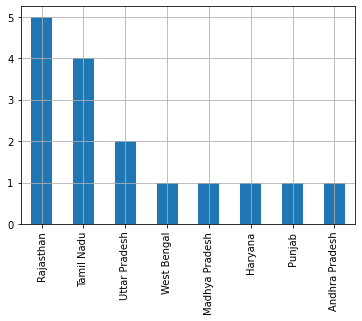

In [37]:
#plotting count

merged_df.state.value_counts().plot(kind='bar').grid()

In [38]:
#finding the maximum distance traveled by a train

merged_df.query('distance==distance.max()')

,nameto_station_code,to_station_code,to_station_name,duration_h,distance,code,namecode,zone,state,address,latitude,longitude
1,BANDRA TERMINUS - JAMMU TAWI AC Suvidha Specia...,JAT,JAMMU TAWI,32.0,1955.0,KHH,KICHHA,NER,Uttar Pradesh,"Kichha, Uttar Pradesh",79.519746,28.913427


In [39]:
#to find the state that has the most stations
stations_count=stations.groupby('state').count()
stations_count.head()

,code,name,zone,address,latitude,longitude
state,,,,,,
Andhra Pradesh,202,202,202,202,202,202
Assam,188,188,188,188,188,188
Bangladesh,1,1,1,1,1,1
Bihar,185,185,185,185,185,185
Chandigarh,2,2,2,2,2,2


In [40]:
stations_count=stations_count.reset_index()
stations_count.head()

,state,code,name,zone,address,latitude,longitude
0,Andhra Pradesh,202,202,202,202,202,202
1,Assam,188,188,188,188,188,188
2,Bangladesh,1,1,1,1,1,1
3,Bihar,185,185,185,185,185,185
4,Chandigarh,2,2,2,2,2,2


In [41]:
#sorts values as per condition
stations_count.sort_values(by='code',ascending=False).head()

,state,code,name,zone,address,latitude,longitude
26,Uttar Pradesh,523,523,523,523,523,523
23,Rajasthan,443,443,443,443,443,443
8,Gujarat,366,366,366,366,366,366
16,Maharashtra,346,346,346,346,346,346
28,West Bengal,332,332,332,332,332,332


In [42]:
df=trains.join(stations,lsuffix='from_station_code',rsuffix='code',how='left')
df.head()

,number,namefrom_station_code,type,zonefrom_station_code,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,...,first_ac,first_class,chair_car,code,namecode,zonecode,state,address,latitude,longitude
0,04601,Jammu Tawi Udhampur Special,DEMU,NR,JAT,JAMMU TAWI,UHP,UDHAMPUR,10:40:00,12:15:00,...,0,0,0,BDHL,Badhal,NWR,Rajasthan,"Kishangarh Renwal, Rajasthan",75.451645,27.252059
1,04602,UDHAMPUR JAMMUTAWI DMU,DEMU,NR,UHP,UDHAMPUR,JAT,JAMMU TAWI,06:45:00,08:35:00,...,0,0,0,KHH,KICHHA,NER,Uttar Pradesh,"Kichha, Uttar Pradesh",79.519746,28.913427
2,04603,JAT UDAHMPUR DMU,DEMU,NR,JAT,JAMMU TAWI,UHP,UDHAMPUR,16:15:00,17:50:00,...,0,0,0,SRKN,Sherekan,NWR,Rajasthan,"MDR 89, Rajasthan",74.434991,29.555198
3,04604,UDHAMPUR JAMMUTAWI DMU,DEMU,NR,UHP,UDHAMPUR,JAT,JAMMU TAWI,18:20:00,19:50:00,...,0,0,0,BKKA,Bhukarka,NWR,Rajasthan,"Bhukarka, Rajasthan",74.751031,29.238227
4,04728,Mumbai BandraT-Bikaner SF Special,SF,NWR,BDTS,MUMBAI BANDRA TERMINUS,BKN,BIKANER JN,14:35:00,12:30:00,...,0,0,0,NHR,Nohar,NWR,Rajasthan,"State Highway 36, Rajasthan",74.773628,29.192563


In [43]:
#finding the longest duration of the train that departs from UP
df_up=df.query('state=="Uttar Pradesh"')
df_up.head()

,number,namefrom_station_code,type,zonefrom_station_code,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,...,first_ac,first_class,chair_car,code,namecode,zonecode,state,address,latitude,longitude
1,04602,UDHAMPUR JAMMUTAWI DMU,DEMU,NR,UHP,UDHAMPUR,JAT,JAMMU TAWI,06:45:00,08:35:00,...,0,0,0,KHH,KICHHA,NER,Uttar Pradesh,"Kichha, Uttar Pradesh",79.519746,28.913427
25,11039,Maharashtra Express,Exp,CR,KOP,C SHAHU M RAJ KOLHAPUR TERM,G,GONDIA JN,15:30:00,20:15:00,...,0,0,0,BTU,BARAUT,NR,Uttar Pradesh,"Baraut, Uttar Pradesh",77.273006,29.096920
60,06008,KollamChennai Central SF Special,SF,SR,QLN,KOLLAM JN,MAS,CHENNAI CENTRAL,11:30:00,03:40:00,...,0,0,0,IJ,ITAUNJA,NER,Uttar Pradesh,"Itaunja, Uttar Pradesh",80.891234,27.081067
62,06011,Chennai Central Kollam (Weekly) SF Special,SF,SR,MAS,CHENNAI CENTRAL,QLN,KOLLAM JN,15:15:00,05:45:00,...,0,0,0,PBE,PILIBHIT JN,NER,Uttar Pradesh,"Pilibhit, Uttar Pradesh",79.813946,28.614978
79,06617,Coimbatore-Nagercoil Special,Exp,SR,CBE,COIMBATORE JN,NCJ,NAGERCOIL JN,20:20:00,06:40:00,...,0,0,0,MBA,MAHOBA,NCR,Uttar Pradesh,"Junction Point - Khajuraho, Uttar Pradesh",79.849079,25.306914


In [45]:
df_up.shape

(485, 27)

In [46]:
df_up.columns

Index(['number', 'namefrom_station_code', 'type', 'zonefrom_station_code',
       'from_station_code', 'from_station_name', 'to_station_code',
       'to_station_name', 'departure', 'arrival', 'duration_h', 'duration_m',
       'distance', 'return_train', 'sleeper', 'third_ac', 'second_ac',
       'first_ac', 'first_class', 'chair_car', 'code', 'namecode', 'zonecode',
       'state', 'address', 'latitude', 'longitude'],
      dtype='object')

In [47]:
df_up.sort_values(by='distance',ascending=False)[['to_station_code','distance','duration_h','code']].head()

,to_station_code,distance,duration_h,code
715,ERS,3441.0,62.0,KHOH
709,GHY,2992.0,54.0,KJC
655,PNBE,2988.0,59.0,JKI
1573,MAS,2800.0,58.0,CM
526,PPTA,2729.0,48.0,GLH


In [48]:
df_up.to_csv('up_trains.csv')